<a href="https://colab.research.google.com/github/AshishShinde03/Ashish-Shinde_Portfolio/blob/main/Copy_of_OBV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#Importing Packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import yfinance as yf
from datetime import*
from sklearn.model_selection import train_test_split
import seaborn as sns

In [21]:
ticker = 'panw'
start = '2022-01-01'
end = '2022-12-31'

In [22]:
df_pawn = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [23]:
df_pawn = df_pawn.reset_index(0).reset_index(drop=True)

In [24]:
ff_data = pd.read_csv('/content/F-F_Research_Data_Factors_daily_Cleaned.csv')

In [25]:
ff_data

,Date,Mkt-RF,SMB,HML,RF
0,20220103,0.73,0.33,0.78,0.000
1,20220104,-0.29,-0.82,3.62,0.000
2,20220105,-2.28,-1.46,2.60,0.000
3,20220106,0.00,0.21,1.75,0.000
4,20220107,-0.48,-1.32,2.02,0.000
...,...,...,...,...,...
246,20221223,0.51,-0.60,1.15,0.016
247,20221227,-0.51,-0.73,1.43,0.016
248,20221228,-1.23,-0.24,-0.29,0.016
249,20221229,1.87,1.26,-1.07,0.016


In [26]:
df_pawn['row_id'] = range(len(df_pawn))
ff_data['row_id'] = range(len(ff_data))

In [27]:
merged_df1 = pd.merge(df_pawn, ff_data, on='row_id')

In [28]:
merged_df1

,Date_x,Open,High,Low,Close,Adj Close,Volume,row_id,Date_y,Mkt-RF,SMB,HML,RF
0,2022-01-03,186.146667,186.800003,179.279999,181.403336,181.403336,3901200,0,20220103,0.73,0.33,0.78,0.000
1,2022-01-04,179.149994,181.443329,171.113327,174.666672,174.666672,4793100,1,20220104,-0.29,-0.82,3.62,0.000
2,2022-01-05,171.083328,173.496674,167.220001,168.286667,168.286667,3747000,2,20220105,-2.28,-1.46,2.60,0.000
3,2022-01-06,167.000000,180.333328,165.669998,177.636673,177.636673,8276700,3,20220106,0.00,0.21,1.75,0.000
4,2022-01-07,175.619995,182.733337,174.766663,175.163330,175.163330,6793200,4,20220107,-0.48,-1.32,2.02,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2022-12-23,143.119995,143.320007,140.539993,141.270004,141.270004,2966600,246,20221223,0.51,-0.60,1.15,0.016
247,2022-12-27,140.529999,141.339996,139.009995,139.210007,139.210007,2994200,247,20221227,-0.51,-0.73,1.43,0.016
248,2022-12-28,139.179993,139.630005,136.740005,137.330002,137.330002,3276000,248,20221228,-1.23,-0.24,-0.29,0.016
249,2022-12-29,138.410004,141.589996,138.100006,140.199997,140.199997,3635200,249,20221229,1.87,1.26,-1.07,0.016


In [29]:
merged_df1.drop('row_id', axis=1, inplace=True)

In [30]:
merged_df1

,Date_x,Open,High,Low,Close,Adj Close,Volume,Date_y,Mkt-RF,SMB,HML,RF
0,2022-01-03,186.146667,186.800003,179.279999,181.403336,181.403336,3901200,20220103,0.73,0.33,0.78,0.000
1,2022-01-04,179.149994,181.443329,171.113327,174.666672,174.666672,4793100,20220104,-0.29,-0.82,3.62,0.000
2,2022-01-05,171.083328,173.496674,167.220001,168.286667,168.286667,3747000,20220105,-2.28,-1.46,2.60,0.000
3,2022-01-06,167.000000,180.333328,165.669998,177.636673,177.636673,8276700,20220106,0.00,0.21,1.75,0.000
4,2022-01-07,175.619995,182.733337,174.766663,175.163330,175.163330,6793200,20220107,-0.48,-1.32,2.02,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
246,2022-12-23,143.119995,143.320007,140.539993,141.270004,141.270004,2966600,20221223,0.51,-0.60,1.15,0.016
247,2022-12-27,140.529999,141.339996,139.009995,139.210007,139.210007,2994200,20221227,-0.51,-0.73,1.43,0.016
248,2022-12-28,139.179993,139.630005,136.740005,137.330002,137.330002,3276000,20221228,-1.23,-0.24,-0.29,0.016
249,2022-12-29,138.410004,141.589996,138.100006,140.199997,140.199997,3635200,20221229,1.87,1.26,-1.07,0.016


In [31]:
df = merged_df1

In [33]:
# Calculate the On-Balance Volume (OBV) indicator
merged_df1['OBV'] = np.where(merged_df1['Close'] > merged_df1['Close'].shift(1), merged_df1['Volume'], 
                       np.where(merged_df1['Close'] < merged_df1['Close'].shift(1), -merged_df1['Volume'], 0)).cumsum()

In [34]:
# Define the dependent and independent variables
y = df['Close']
X = df[['Close', 'OBV']].shift(1).dropna()

In [35]:
import statsmodels.api as sm
# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y[1:], X)
results = model.fit()

In [36]:
# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     992.2
Date:                Fri, 24 Mar 2023   Prob (F-statistic):          8.89e-119
Time:                        16:58:16   Log-Likelihood:                -760.66
No. Observations:                 250   AIC:                             1527.
Df Residuals:                     247   BIC:                             1538.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1896      5.194      2.732      0.0

In [37]:
# Calculate the lagged values
df['Yt-1'] = df['Adj Close'].shift(1)
df['OBVt-1'] = df['OBV'].shift(1)

In [38]:
Yt = 8.4357 + 0.7275*df['Yt-1'] + 5.6e-08*df['OBVt-1']

In [39]:
Yt = 8.4357 + 0.7275*df['Adj Close'].shift(1) + 5.6e-08*df['OBV'].shift(1)


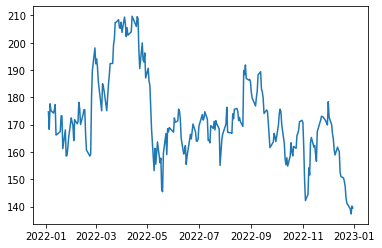

In [40]:
plt.plot(df['Date_x'].iloc[1:], df['Close'].iloc[1:], label='Close')

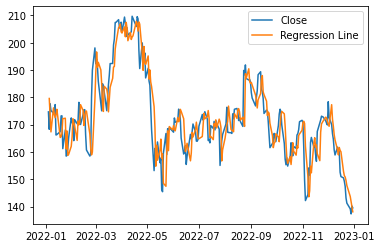

In [41]:
# Plot the data
plt.plot(df['Date_x'].iloc[1:], df['Close'].iloc[1:], label='Close')

# Plot the regression line
y_pred = results.predict(X)
plt.plot(df['Date_x'].iloc[2:], y_pred[:-1], label='Regression Line')

plt.legend()
plt.show()


In [42]:
# Calculate residuals
residuals = df['Close'].iloc[1:] - y_pred

# Calculate MSE and RMSE
mse = np.mean(residuals ** 2)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)


MSE: 25.72381810031644
RMSE: 5.0718653472185595
